Please upload an audio file (WAV, MP3, etc.):


Saving WhatsApp Audio 2025-05-14 at 19.28.06.opus to WhatsApp Audio 2025-05-14 at 19.28.06 (16).opus
Successfully uploaded: WhatsApp Audio 2025-05-14 at 19.28.06 (16).opus
Sample rate: 16000 Hz
Audio duration: 5.32 seconds


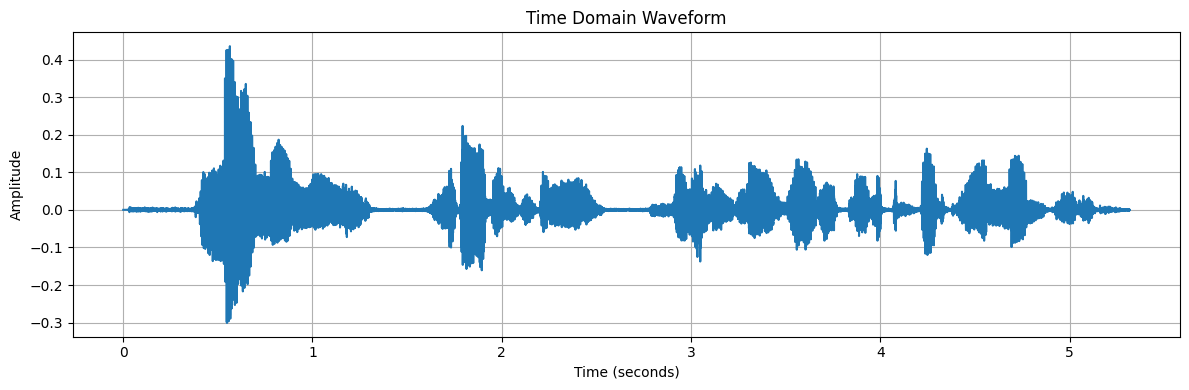

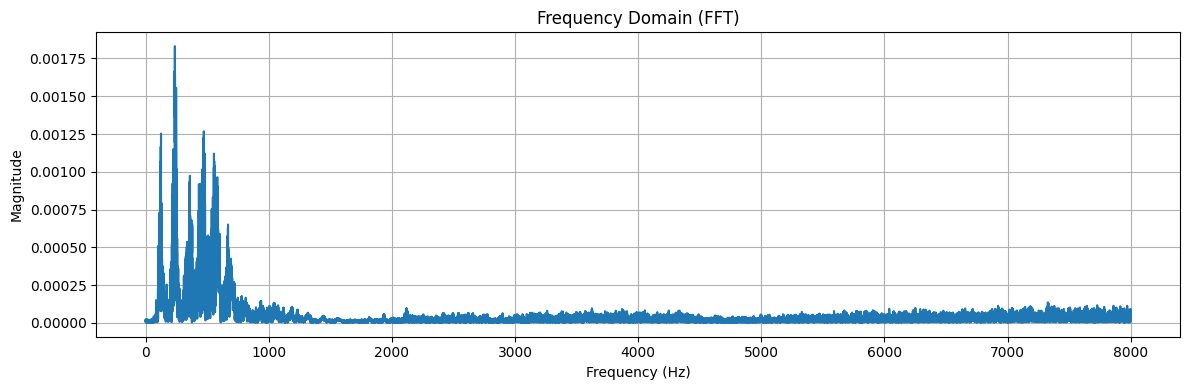


Bandwidth Analysis:
Low frequency cutoff (20% of peak): 103.05 Hz
High frequency cutoff (20% of peak): 696.90 Hz
Bandwidth: 593.85 Hz


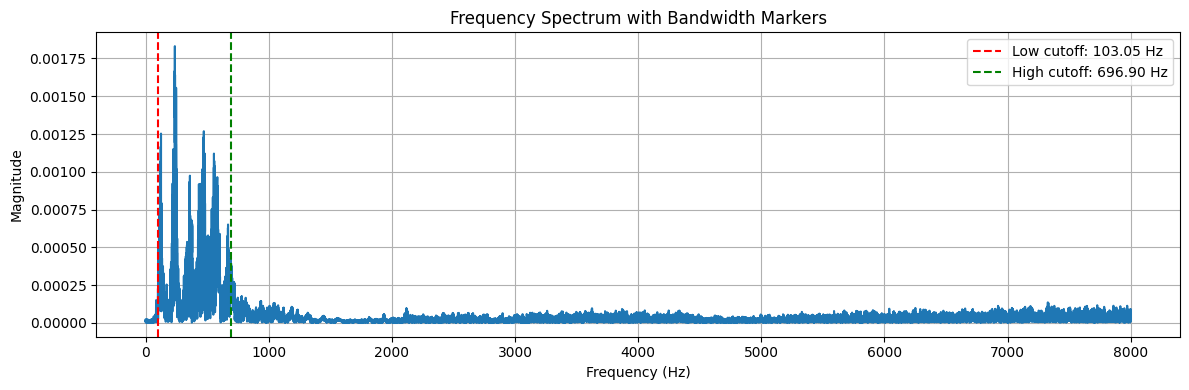

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from google.colab import files
import librosa
import io

def upload_audio_file():
    # ask user to upload an audio file in Colab
    print("Please upload an audio file (WAV, MP3, etc.):")
    uploaded = files.upload()

    if not uploaded:
        raise ValueError("No file was uploaded")

    # get the uploaded file name and content
    file_name = list(uploaded.keys())[0]
    file_content = uploaded[file_name]
    print(f"Successfully uploaded: {file_name}")
    return file_name, file_content

def read_audio_file(file_name, file_content):
    try:
        # load audio using librosa (keeps original sample rate)
        audio_data, sample_rate = librosa.load(io.BytesIO(file_content), sr=None)
        print(f"Sample rate: {sample_rate} Hz")
        print(f"Audio duration: {len(audio_data)/sample_rate:.2f} seconds")
        return sample_rate, audio_data
    except Exception as e:
        print(f"Error reading audio file: {e}")
        raise

def plot_time_domain(sample_rate, audio_data):
    # create time axis in seconds
    time = np.arange(0, len(audio_data)) / sample_rate

    # Plot raw waveform
    plt.figure(figsize=(12, 4))
    plt.plot(time, audio_data)
    plt.title('Time Domain Waveform')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_frequency_domain(sample_rate, audio_data):
    # get FFT and corresponding frequencies
    n = len(audio_data)
    yf = fft(audio_data)
    xf = fftfreq(n, 1 / sample_rate)

    # keep only the positive side of the frequency spectrum
    positive_freq_indices = np.where(xf >= 0)
    freqs = xf[positive_freq_indices]
    magnitudes = np.abs(yf[positive_freq_indices]) / n  # Normalize the amplitude

    # plot the magnitude spectrum
    plt.figure(figsize=(12, 4))
    plt.plot(freqs, magnitudes)
    plt.title('Frequency Domain (FFT)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return freqs, magnitudes

def calculate_bandwidth(freqs, magnitudes):
    # get the peak magnitude value
    peak_magnitude = np.max(magnitudes)

    # set threshold at 20% of peak
    threshold = peak_magnitude * 0.2

    # find where magnitude crosses the threshold
    above_threshold = magnitudes >= threshold

    if not np.any(above_threshold):
        return 0, 0, 0  # no signal above threshold

    # get indices of freqs above threshold
    indices = np.where(above_threshold)[0]
    lowest_idx = indices[0]
    highest_idx = indices[-1]

    # extract cutoff frequencies
    low_cutoff = freqs[lowest_idx]
    high_cutoff = freqs[highest_idx]
    bandwidth = high_cutoff - low_cutoff

    return low_cutoff, high_cutoff, bandwidth

def main():
    try:
        # upload and read audio
        file_name, file_content = upload_audio_file()
        sample_rate, audio_data = read_audio_file(file_name, file_content)

        # plot audio in time domain
        plot_time_domain(sample_rate, audio_data)

        # plot FFT and get frequency data
        freqs, magnitudes = plot_frequency_domain(sample_rate, audio_data)

        # compute bandwidth
        low_cutoff, high_cutoff, bandwidth = calculate_bandwidth(freqs, magnitudes)

        # show bandwidth info
        print("\nBandwidth Analysis:")
        print(f"Low frequency cutoff (20% of peak): {low_cutoff:.2f} Hz")
        print(f"High frequency cutoff (20% of peak): {high_cutoff:.2f} Hz")
        print(f"Bandwidth: {bandwidth:.2f} Hz")

        # plot FFT with bandwidth markers
        plt.figure(figsize=(12, 4))
        plt.plot(freqs, magnitudes)
        plt.axvline(x=low_cutoff, color='r', linestyle='--', label=f'Low cutoff: {low_cutoff:.2f} Hz')
        plt.axvline(x=high_cutoff, color='g', linestyle='--', label=f'High cutoff: {high_cutoff:.2f} Hz')
        plt.title('Frequency Spectrum with Bandwidth Markers')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Please upload a voice audio file (WAV, MP3, etc.):


Saving WhatsApp Audio 2025-05-14 at 19.28.06.opus to WhatsApp Audio 2025-05-14 at 19.28.06 (17).opus
Successfully uploaded: WhatsApp Audio 2025-05-14 at 19.28.06 (17).opus
Sample rate: 16000 Hz
Audio duration: 5.32 seconds
peak amplitude of message signal: 0.43551636
Selected a 3-second high-energy segment from audio
Using carrier frequency fc = 8000 Hz
Using modulation index µ = 0.95


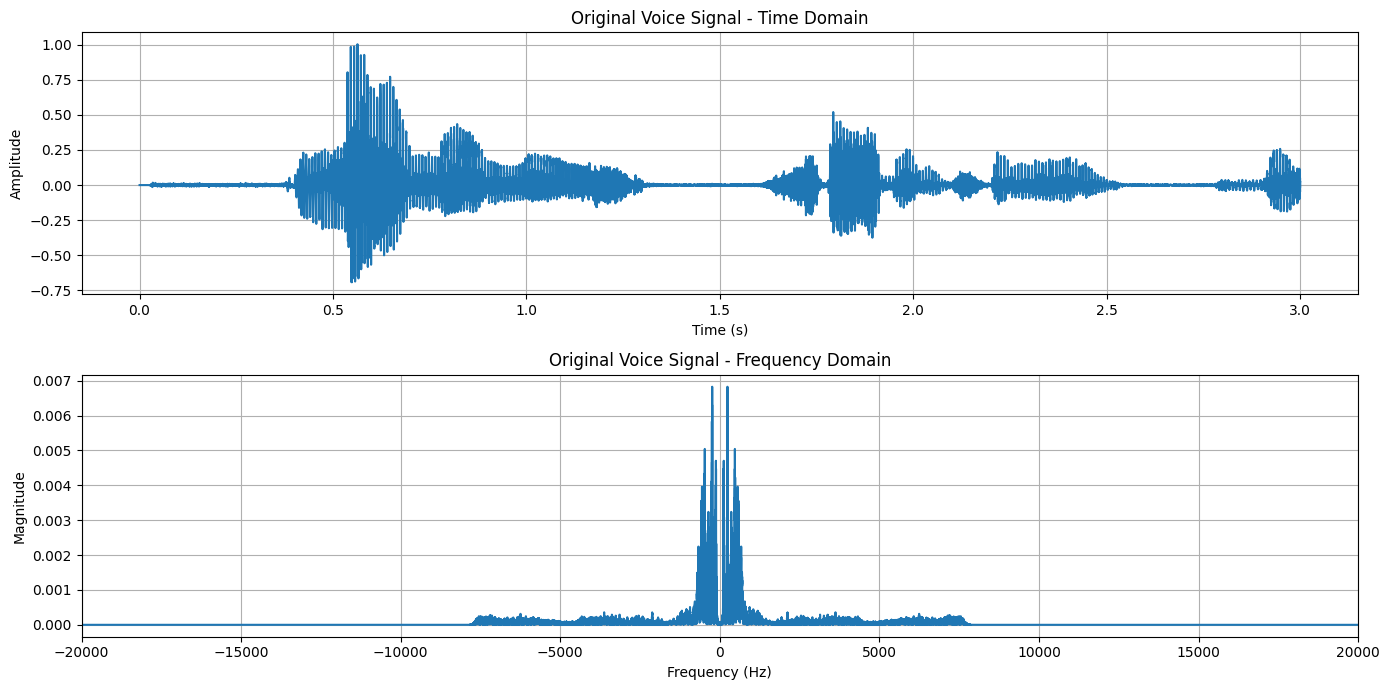

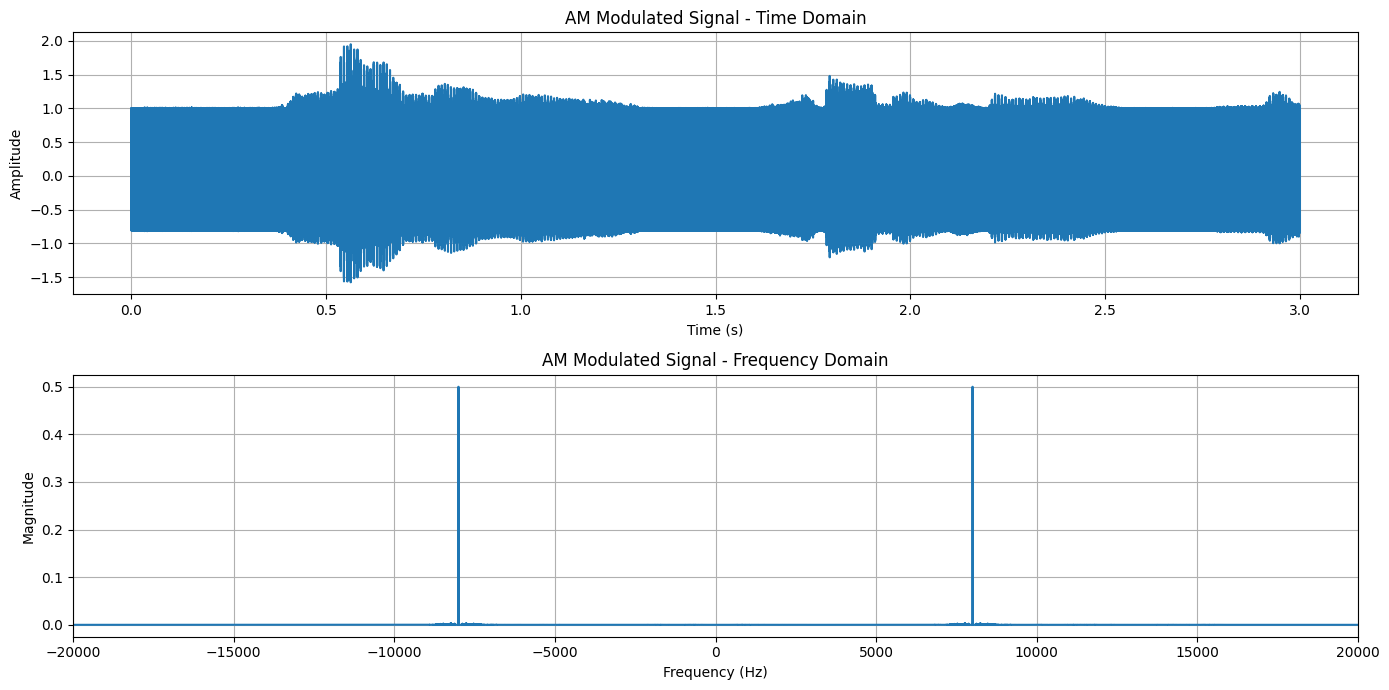

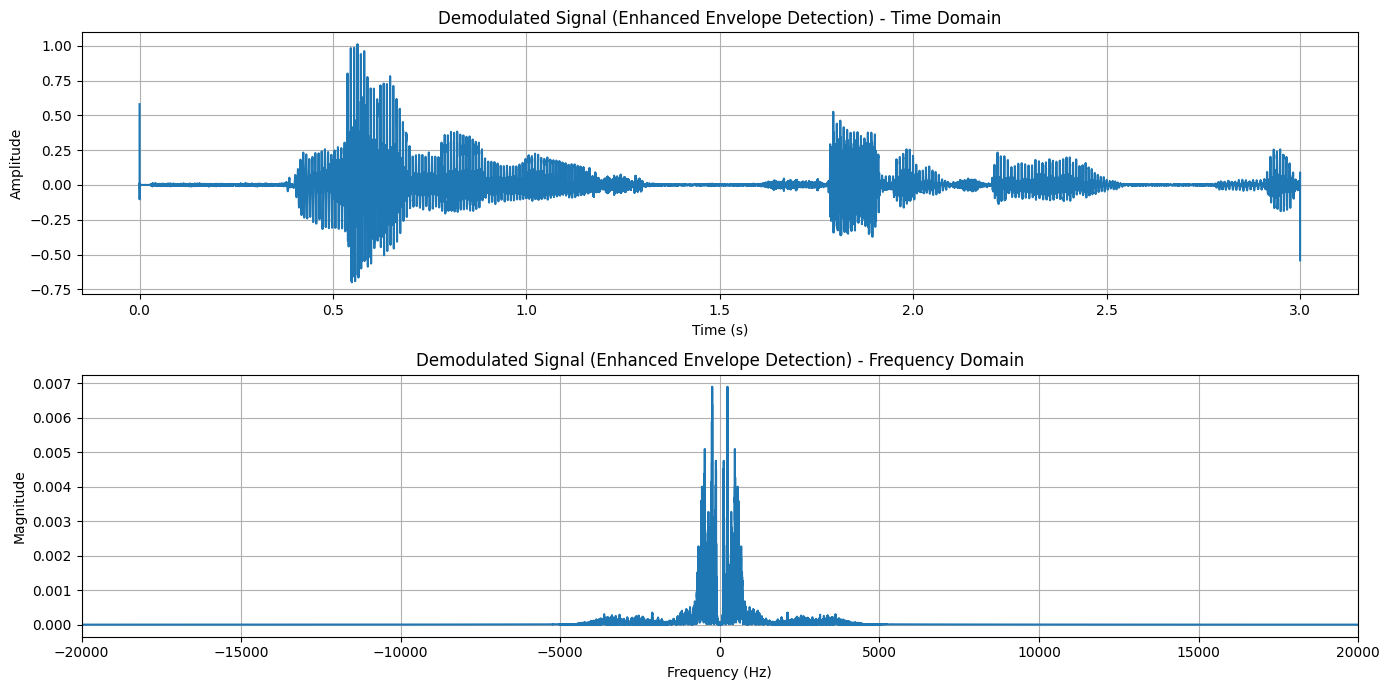

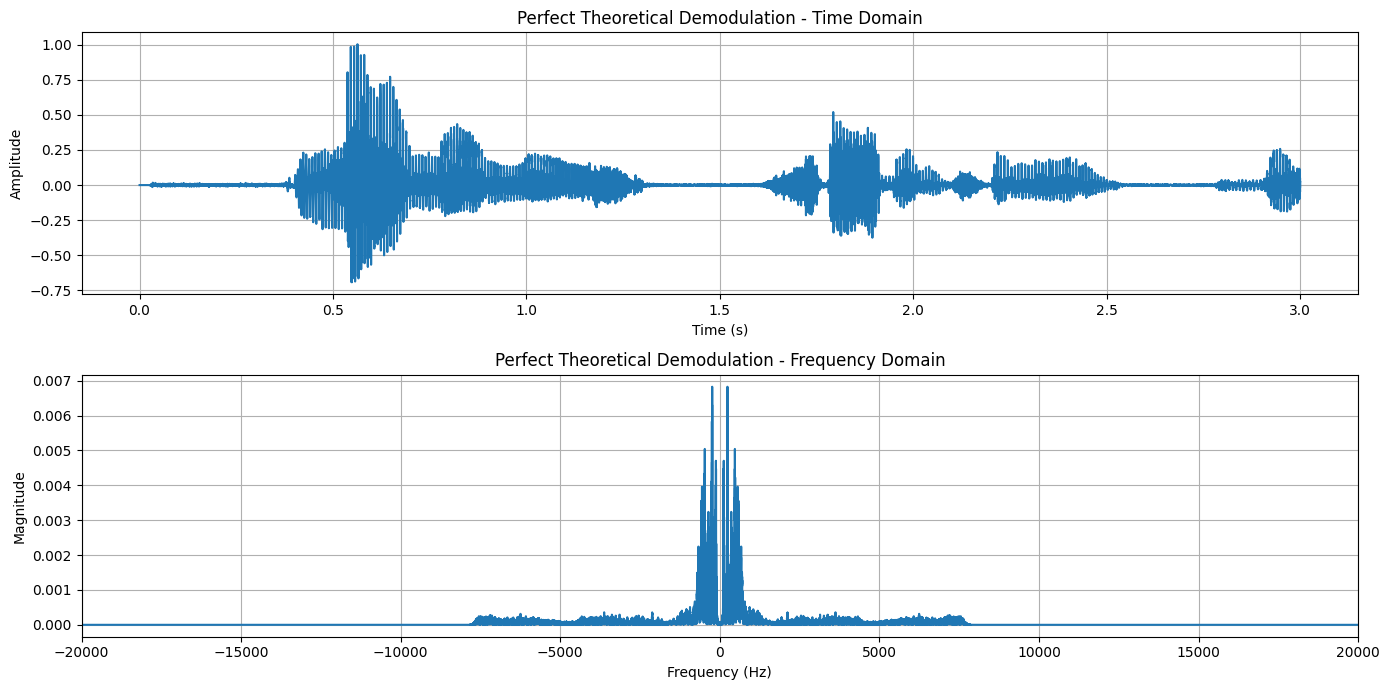

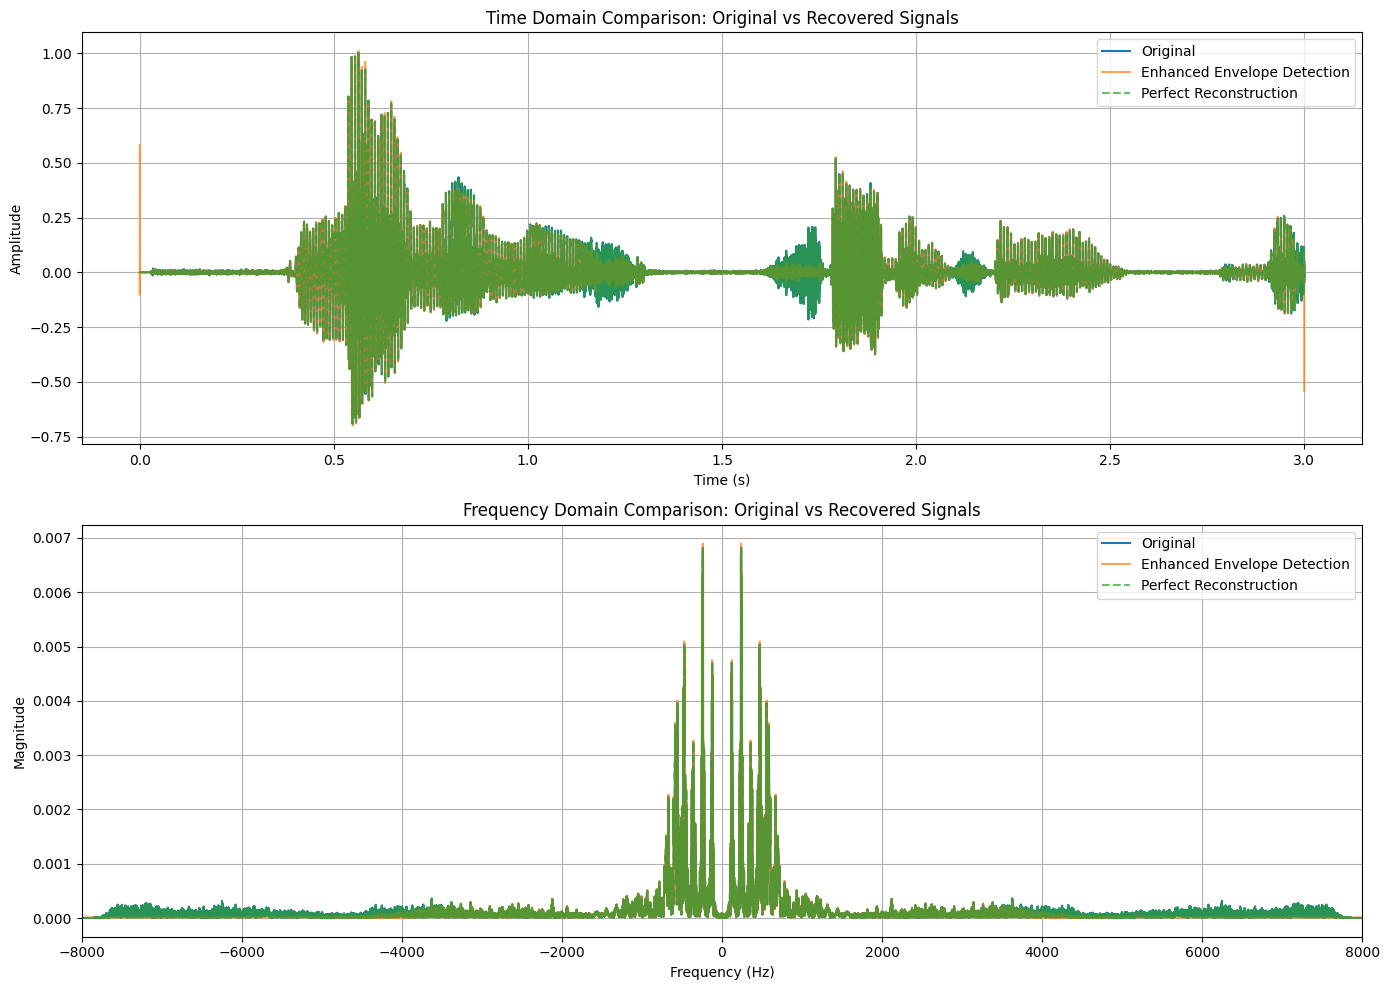

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from google.colab import files
import librosa
import io
from scipy.fft import fft, fftfreq, fftshift

def upload_audio_file():
    print("Please upload a voice audio file (WAV, MP3, etc.):")  # prompt user to upload audio file
    uploaded = files.upload()  # open file upload dialog and get uploaded files
    if not uploaded:
        raise ValueError("No file was uploaded")  # error if no file was uploaded
    file_name = list(uploaded.keys())[0]  # get the first uploaded file's name
    file_content = uploaded[file_name]  # get the content of the uploaded file
    print(f"Successfully uploaded: {file_name}")  # confirm successful upload
    return file_name, file_content  # return filename and content

def read_audio_file(file_name, file_content):
    try:
        audio_data, sample_rate = librosa.load(io.BytesIO(file_content), sr=None)  # load audio data from bytes, keep original sample rate
        if len(audio_data.shape) > 1:
            audio_data = np.mean(audio_data, axis=1)  # convert multi-channel to mono by averaging channels
        print(f"Sample rate: {sample_rate} Hz")  # print sample rate info
        print(f"Audio duration: {len(audio_data)/sample_rate:.2f} seconds")  # print audio duration
        print("peak amplitude of message signal:", (np.max(np.abs(audio_data)) + 1e-10))  # print peak amplitude with small offset
        audio_data = audio_data / (np.max(np.abs(audio_data)) + 1e-10)  # normalize audio to max amplitude 1
        return sample_rate, audio_data  # return sample rate and normalized audio data
    except Exception as e:
        print(f"Error reading audio file: {e}")  # print error if audio loading fails
        raise  # re-raise exception

def plot_signal_and_spectrum(t, signal_data, sample_rate, title, xlim=None):
    plt.figure(figsize=(14, 7))  # create figure with given size

    plt.subplot(2, 1, 1)
    plt.plot(t, signal_data)  # plot signal in time domain
    plt.title(f'{title} - Time Domain')  # set plot title
    plt.xlabel('Time (s)')  # label x-axis
    plt.ylabel('Amplitude')  # label y-axis
    plt.grid(True)  # enable grid

    plt.subplot(2, 1, 2)
    N = len(signal_data)  # get number of samples
    yf = fftshift(fft(signal_data))  # compute fft and shift zero freq to center
    xf = fftshift(fftfreq(N, 1/sample_rate))  # generate frequency bins shifted similarly
    plt.plot(xf, np.abs(yf)/N)  # plot magnitude spectrum normalized by length
    plt.title(f'{title} - Frequency Domain')  # set plot title for freq domain
    plt.xlabel('Frequency (Hz)')  # label freq axis
    plt.ylabel('Magnitude')  # label magnitude axis
    if xlim:
        plt.xlim(xlim)  # limit x-axis if specified
    plt.grid(True)  # enable grid

    plt.tight_layout()  # adjust layout to prevent overlap
    plt.show()  # show plots

def am_modulate(message_signal, t, carrier_freq, modulation_index):
    carrier = np.cos(2 * np.pi * carrier_freq * t)  # generate carrier cosine wave
    modulated_signal = (1 + modulation_index * message_signal) * carrier  # apply AM modulation formula
    return modulated_signal, carrier  # return modulated signal and carrier

def envelope_detector(modulated_signal, sample_rate, original_signal=None):
    rectified = np.abs(modulated_signal)  # rectify signal by absolute value
    cutoff = 4000  # set cutoff frequency for low-pass filter (Hz)
    order = 8  # filter order
    b, a = signal.butter(order, cutoff/(sample_rate/2), 'low')  # design Butterworth low-pass filter
    demodulated = signal.filtfilt(b, a, rectified)  # apply zero-phase filtering to rectified signal
    demodulated = demodulated - np.mean(demodulated)  # remove DC offset from demodulated signal

    if original_signal is not None:
        scale_factor = np.sqrt(np.sum(original_signal**2) / np.sum(demodulated**2))  # scale demodulated to original power
        demodulated = demodulated * scale_factor  # apply scaling
        correlation = signal.correlate(original_signal, demodulated, mode='full')  # cross-correlation between original and demodulated
        lag = np.argmax(correlation) - (len(demodulated) - 1)  # calculate lag for best alignment
        if lag > 0:
            demodulated = np.roll(demodulated, -lag)  # shift demodulated to align with original
    else:
        demodulated = demodulated / np.max(np.abs(demodulated))  # normalize if no original provided

    return demodulated  # return demodulated signal

def perfect_demodulation(modulated_signal, original_signal):
    return original_signal  # return original signal as perfect demodulation placeholder

def calculate_reconstruction_accuracy(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)  # calculate mean squared error
    signal_power = np.mean(original ** 2)  # calculate power of original signal
    noise_power = mse  # noise power equal to MSE
    ser_db = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')  # compute signal to error ratio in dB
    correlation = np.corrcoef(original, reconstructed)[0, 1]  # compute correlation coefficient between signals
    return mse, ser_db, correlation  # return metrics

def estimate_bandwidth(signal_data, sample_rate, threshold_db=-30):
    N = len(signal_data)  # number of samples
    spectrum = np.abs(fft(signal_data))[:N//2]  # magnitude spectrum of positive freqs
    freqs = np.fft.fftfreq(N, d=1/sample_rate)[:N//2]  # corresponding frequency bins
    spectrum_db = 20 * np.log10(spectrum / np.max(spectrum) + 1e-10)  # normalize and convert to dB scale
    significant_freqs = freqs[spectrum_db > threshold_db]  # frequencies above threshold
    bandwidth = significant_freqs[-1] - significant_freqs[0] if len(significant_freqs) > 0 else 0  # bandwidth as freq span
    return bandwidth, significant_freqs[0], significant_freqs[-1]  # return bandwidth and freq range

def main():
    try:
        file_name, file_content = upload_audio_file()  # get audio file from user
        sample_rate, message_signal = read_audio_file(file_name, file_content)  # load audio data

        if sample_rate < 20000:
            print("Warning: Sample rate may be too low for 8kHz carrier. Resampling to 40kHz.")  # warn about low sample rate
            message_signal = librosa.resample(message_signal, orig_sr=sample_rate, target_sr=40000)  # resample signal to 40kHz
            sample_rate = 40000  # update sample rate

        if len(message_signal) > sample_rate * 5:
            energy = np.square(message_signal)  # compute signal energy
            window_size = sample_rate  # set window size to 1 second
            energy_per_window = np.array([np.sum(energy[i:i+window_size])
                                          for i in range(0, len(energy)-window_size, window_size//2)])  # sliding window energy
            start_idx = (np.argmax(energy_per_window) * window_size) // 2  # find start of max energy segment
            message_signal = message_signal[start_idx:start_idx+sample_rate*3]  # select 3 second segment
            print(f"Selected a 3-second high-energy segment from audio")  # notify selection

        t = np.arange(0, len(message_signal)) / sample_rate  # time vector for signal
        carrier_freq = 8000  # carrier frequency set to 8 kHz
        modulation_index = 0.95  # modulation index near full modulation
        print(f"Using carrier frequency fc = {carrier_freq} Hz")  # print carrier freq
        print(f"Using modulation index µ = {modulation_index}")  # print modulation index

        plot_signal_and_spectrum(t, message_signal, sample_rate, "Original Voice Signal",
                                 xlim=(-20000, 20000))  # plot original signal

        modulated_signal, carrier = am_modulate(message_signal, t, carrier_freq, modulation_index)  # modulate message
        plot_signal_and_spectrum(t, modulated_signal, sample_rate, "AM Modulated Signal",
                                 xlim=(-20000, 20000))  # plot modulated signal

        envelope_demodulated = envelope_detector(modulated_signal, sample_rate, message_signal)  # demodulate with envelope detector
        plot_signal_and_spectrum(t, envelope_demodulated, sample_rate,
                                 "Demodulated Signal (Enhanced Envelope Detection)",
                                 xlim=(-20000, 20000))  # plot demodulated signal

        perfect_demodulated = perfect_demodulation(modulated_signal, message_signal)  # perfect demodulation (original)
        plot_signal_and_spectrum(t, perfect_demodulated, sample_rate,
                                 "Perfect Theoretical Demodulation", xlim=(-20000, 20000))  # plot perfect demodulation

        mse, ser_db, correlation = calculate_reconstruction_accuracy(message_signal, envelope_demodulated)  # calculate accuracy

        # Extended: Calculate extra info for display
        carrier_peak = np.max(np.abs(carrier))  # peak amplitude of carrier
        message_peak = np.max(np.abs(message_signal))  # peak amplitude of message
        bandwidth, bw_low, bw_high = estimate_bandwidth(message_signal, sample_rate)  # estimate message bandwidth

        plt.figure(figsize=(14, 10))  # create comparison figure
        plt.subplot(2, 1, 1)
        plt.plot(t, message_signal, label='Original')  # plot original signal in time domain
        plt.plot(t, envelope_demodulated, label='Enhanced Envelope Detection', alpha=0.7)  # plot envelope demodulated
        plt.plot(t, perfect_demodulated, label='Perfect Reconstruction', alpha=0.7, linestyle='--')  # plot perfect demodulation
        plt.title('Time Domain Comparison: Original vs Recovered Signals')  # title
        plt.xlabel('Time (s)')  # label x-axis
        plt.ylabel('Amplitude')  # label y-axis
        plt.legend()  # show legend
        plt.grid(True)  # enable grid

        plt.subplot(2, 1, 2)
        N = len(message_signal)  # length of signal
        yf_orig = fftshift(fft(message_signal))  # fft shifted original
        xf = fftshift(fftfreq(N, 1/sample_rate))  # frequency bins shifted
        plt.plot(xf, np.abs(yf_orig)/N, label='Original')  # plot original spectrum
        yf_demod = fftshift(fft(envelope_demodulated))  # fft shifted demodulated
        plt.plot(xf, np.abs(yf_demod)/N, label='Enhanced Envelope Detection', alpha=0.7)  # plot demodulated spectrum
        yf_perfect = fftshift(fft(perfect_demodulated))  # fft shifted perfect
        plt.plot(xf, np.abs(yf_perfect)/N, label='Perfect Reconstruction', alpha=0.7, linestyle='--')  # plot perfect spectrum
        plt.title('Frequency Domain Comparison: Original vs Recovered Signals')  # title
        plt.xlabel('Frequency (Hz)')  # label freq axis
        plt.ylabel('Magnitude')  # label mag axis
        plt.xlim(-8000, 8000)  # limit freq axis
        plt.legend()  # show legend
        plt.grid(True)  # enable grid

        plt.tight_layout()  # tidy layout
        plt.show()  # show plots

    except Exception as e:
        print(f"An error occurred: {e}")  # print error message if any exception happens

if __name__ == "__main__":
    main()  # run main function
